In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture 
from hmmlearn import hmm

In [4]:
# Read data
train_1 = np.loadtxt('./課題データ/train_1.csv', delimiter=',')
test_1 = np.loadtxt('./課題データ/test_1.csv', delimiter=',')
train_2 = np.loadtxt('./課題データ/train_2.csv', delimiter=',')
test_2 = np.loadtxt('./課題データ/test_2.csv', delimiter=',')

len_train_1 = np.loadtxt('./課題データ/len_train_1.csv', delimiter=',')
len_train_2 = np.loadtxt('./課題データ/len_train_2.csv', delimiter=',')

## 課題1

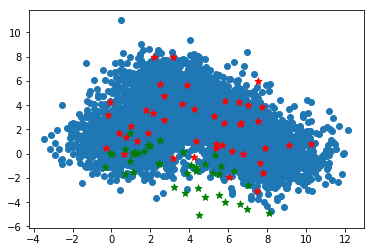

In [5]:
# train_1散布図
plt.scatter(train_1[:,0], train_1[:,1])
plt.scatter(test_1[:,0], test_1[:,1], s=50, marker='*', c='red')
plt.scatter(test_2[:,0], test_2[:,1], s=50, marker='*', c='green');

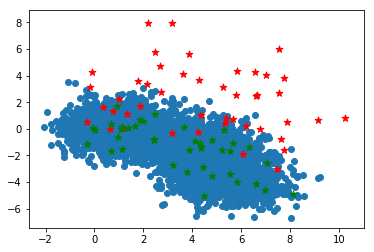

In [6]:
# train_2散布図
plt.scatter(train_2[:,0], train_2[:,1])
plt.scatter(test_1[:,0], test_1[:,1], s=50, marker='*', c='red')
plt.scatter(test_2[:,0], test_2[:,1], s=50, marker='*', c='green');

## 課題2

In [7]:
# hmm_1の作成
ilengths = len_train_1.astype(np.int64)
hmm_1 = hmm.GaussianHMM(n_components=4, n_iter=100, init_params='mc', params='mct')
hmm_1.startprob_ = np.array([1.0, 0.0, 0.0, 0.0])
hmm_1.transmat_ = np.array([[0.5, 0.5, 0.0, 0.0],
                           [0.0, 0.5, 0.5, 0.0],
                           [0.0, 0.0, 0.5, 0.5],
                           [0.0, 0.0, 0.0, 1.0]])
hmm_1.fit(train_1, ilengths)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='mc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=100, params='mct',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [8]:
#HMM stats
print(hmm_1.means_)
print()
print(hmm_1.covars_)
print()
print(hmm_1.transmat_)

[[ 2.97843292  3.03126144]
 [ 8.06959403 -0.01975115]
 [ 7.65808874  0.57584684]
 [ 7.67714528 -0.20944894]]

[[[4.72661532 0.        ]
  [0.         4.54190714]]

 [[2.06452326 0.        ]
  [0.         2.10520342]]

 [[0.79874085 0.        ]
  [0.         1.35413276]]

 [[0.73089373 0.        ]
  [0.         1.74986288]]]

[[0.96981411 0.03018589 0.         0.        ]
 [0.         0.97590798 0.02409202 0.        ]
 [0.         0.         0.78830204 0.21169796]
 [0.         0.         0.         1.        ]]


In [9]:
# hmm_2の作成
ilengths = len_train_2.astype(np.int64)
hmm_2 = hmm.GaussianHMM(n_components=4, n_iter=100, init_params='mc', params='mct')
hmm_2.startprob_ = np.array([1.0, 0.0, 0.0, 0.0])
hmm_2.transmat_ = np.array([[0.5, 0.5, 0.0, 0.0],
                           [0.0, 0.5, 0.5, 0.0],
                           [0.0, 0.0, 0.5, 0.5],
                           [0.0, 0.0, 0.0, 1.0]])
hmm_2.fit(train_2, ilengths)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='mc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=100, params='mct',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [10]:
#HMM stats
print(hmm_2.means_)
print()
print(hmm_2.covars_)
print()
print(hmm_2.transmat_)

[[ 1.00734124 -0.00958752]
 [ 1.02201646  0.01873102]
 [ 4.01826732 -1.0320958 ]
 [ 5.31396667 -3.35379972]]

[[[1.01252794 0.        ]
  [0.         1.00029324]]

 [[0.97416102 0.        ]
  [0.         1.07480827]]

 [[1.0420917  0.        ]
  [0.         0.92039562]]

 [[1.25105478 0.        ]
  [0.         1.21426514]]]

[[0.87570106 0.12429894 0.         0.        ]
 [0.         0.87729166 0.12270834 0.        ]
 [0.         0.         0.91111543 0.08888457]
 [0.         0.         0.         1.        ]]


## 課題3

In [11]:
# test1.csv →　hmm_1
print(hmm_1.predict(test_1))
print(hmm_1.score(test_1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1]
-199.94219534431474


In [12]:
# test1.csv →　hmm_2
print(hmm_2.predict(test_1))
print(hmm_2.score(test_1))

[0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3]
-571.7497490388647


In [13]:
# test1.csvの対数尤度比
hmm_1.score(test_1) - hmm_2.score(test_1)

371.80755369454994

In [14]:
# test2.csv →　hmm_1
print(hmm_1.predict(test_2))
print(hmm_1.score(test_2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1]
-235.2820577503769


In [15]:
# test2.csv →　hmm_2
print(hmm_2.predict(test_2))
print(hmm_2.score(test_2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
-121.40121420163538


In [16]:
# test2.csvの対数尤度比
hmm_1.score(test_2) - hmm_2.score(test_2)

-113.88084354874152

## 課題4

In [24]:
# train_1データのベスト混合数
from sklearn.model_selection import GridSearchCV
#read data
X_all = np.loadtxt('./課題データ/train_1.csv', delimiter=',')
components_params = np.arange(2, 5, 1) #start stop step
paramters = {
    'n_components':components_params
}
model_tuning = GridSearchCV(
    estimator = mixture.GaussianMixture(), # 識別器 
    param_grid = paramters, # パラメタ
)
model_tuning.fit(X_all)
print(model_tuning.best_params_)

{'n_components': 4}


/Users/mikio/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [25]:
# train_1データのベスト混合数
from sklearn.model_selection import GridSearchCV
#read data
X_all = np.loadtxt('./課題データ/train_2.csv', delimiter=',')
components_params = np.arange(2, 5, 1) #start stop step
paramters = {
    'n_components':components_params
}
model_tuning = GridSearchCV(
    estimator = mixture.GaussianMixture(), # 識別器 
    param_grid = paramters, # パラメタ
)
model_tuning.fit(X_all)
print(model_tuning.best_params_)

{'n_components': 3}


/Users/mikio/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [26]:
#train gmm_1
gmm_1 = mixture.GaussianMixture(n_components=4, covariance_type='full')
gmm_1.fit(train_1)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [27]:
#GMM stats

print(gmm_1.means_)
print()
print(gmm_1.covariances_)
print()
print(gmm_1.weights_)

[[2.98024452 5.03549672]
 [7.99129321 0.01960264]
 [5.04972002 2.96039498]
 [0.96380041 1.0715136 ]]

[[[ 1.91980817e+00  3.70844170e-02]
  [ 3.70844170e-02  1.87300777e+00]]

 [[ 1.99059351e+00  4.67241782e-02]
  [ 4.67241782e-02  2.09898195e+00]]

 [[ 1.86462303e+00  1.77589951e-01]
  [ 1.77589951e-01  1.65650513e+00]]

 [[ 2.07053797e+00 -1.19066655e-03]
  [-1.19066655e-03  1.92998714e+00]]]

[0.2600464  0.25122354 0.23710583 0.25162423]


In [28]:
#train gmm_2
gmm_2 = mixture.GaussianMixture(n_components=3, covariance_type='full')
gmm_2.fit(train_2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [29]:
#GMM stats

print(gmm_2.means_)
print()
print(gmm_2.covariances_)
print()
print(gmm_2.weights_)

[[ 4.11043596 -1.19648301]
 [ 5.37858985 -3.51438303]
 [ 1.01510589  0.01928218]]

[[[ 1.17981357 -0.08153401]
  [-0.08153401  1.01152021]]

 [[ 1.23550834 -0.1623644 ]
  [-0.1623644   1.05594183]]

 [[ 1.00637086 -0.00557838]
  [-0.00557838  1.02607585]]]

[0.30061721 0.33367487 0.36570792]


## 課題5

In [30]:
#test1 →　gmm_1
print(gmm_1.score(test_1))

-4.702672679446433


In [31]:
#test1 →　gmm_2
print(gmm_2.score(test_1))

-12.058929640451998


In [32]:
#test1の対数尤度比
gmm_1.score(test_1) - gmm_2.score(test_1)

7.356256961005565

In [33]:
#test2 →　gmm_1
print(gmm_1.score(test_2))

-6.349638739288551


In [34]:
#test2 →　gmm_2
print(gmm_2.score(test_2))

-3.695586831694287


In [35]:
#test2の対数尤度比
gmm_1.score(test_2) - gmm_2.score(test_2)

-2.654051907594264